<a href="https://colab.research.google.com/github/Eddav29/MachineLearning_Ganjil_2024/blob/main/Jobsheet_9_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nama 	: Eddo Dava Alfarisi**
#**Nim	  : 2241720232**
#**Kelas	: 3C**


# **Praktikum 1**

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    0              1             2              3             4            5
0  Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1   1            5.1           3.5            1.4           0.2  Iris-setosa
2   2            4.9           3.0            1.4           0.2  Iris-setosa
3   3            4.7           3.2            1.3           0.2  Iris-setosa
4   4            4.6           3.1            1.5           0.2  Iris-setosa


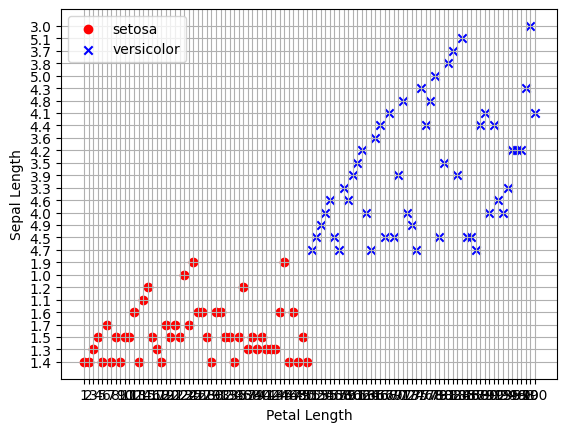

In [20]:
#@title Load Data dan Visualisasi
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/iris.csv',header=None)
print(df.head())
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Visualisasi:
Scatter plot menampilkan hubungan antara:

Sumbu X: Panjang Petal (Petal Length)
Sumbu Y: Panjang Sepal (Sepal Length)
Warna merah (o): Iris setosa
Warna biru (x): Iris versicolor



Grafik ini memvisualisasikan perbedaan karakteristik antara dua spesies iris berdasarkan panjang petal dan sepal mereka. Terlihat bahwa iris setosa cenderung memiliki petal dan sepal yang lebih pendek dibandingkan iris versicolor

In [21]:
#@title membuat kelas perception
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [30]:
# y = df.iloc[0:100, 4].values # pilih 100 data awal
# y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
# X = df.iloc[0:100, [0, 3]].values # slice data latih

# Pilih data dan encoding label
y = df.iloc[1:101, 5].values # pilih 100 data awal mulai dari baris kedua
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[1:101, [1, 3]].values  # SepalLengthCm dan PetalLengthCm (kolom 1 dan 3)

# Pastikan bahwa data numerik memiliki tipe float
X = X.astype(float)

Inisialisasi (init):

eta: Learning rate (default 0.01)
n_iter: Jumlah iterasi (epoch) untuk pelatihan (default 10)


Metode fit(X, y):

X: Data input
y: Label target
Inisialisasi bobot (w_) dengan nol
errors_: List untuk melacak jumlah kesalahan per iterasi

Proses pelatihan:

Melakukan iterasi sebanyak n_iter
Untuk setiap data:

Memprediksi output
Menghitung update bobot
Memperbarui bias (w_[0]) dan bobot (w_[1:])
Menghitung jumlah kesalahan




Metode net_input(X):

Menghitung input bersih (net input) dengan dot product antara input dan bobot, ditambah bias


Metode predict(X):

Menggunakan fungsi aktivasi step
Mengembalikan 1 jika net input >= 0, dan -1 jika sebaliknya

**Algoritma ini bekerja dengan mencoba menemukan garis pemisah (hyperplane) yang dapat memisahkan dua kelas data**

In [27]:
#@title Fitting model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

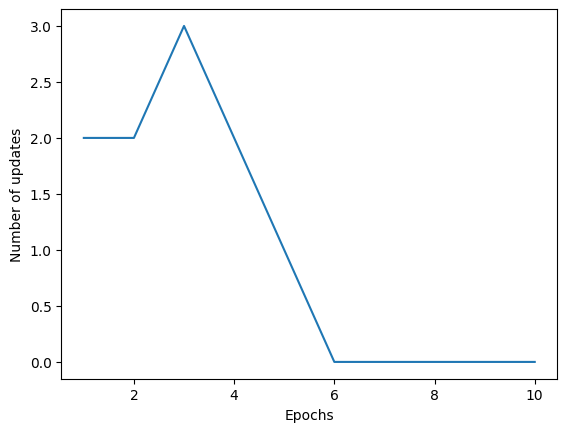

In [28]:
#@title visualisasi nilai error per Epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Ini menunjukkan bahwa model Perceptron belajar dengan baik:

Awalnya, model membuat banyak kesalahan
Seiring waktu, jumlah kesalahan berkurang
Akhirnya, model mencapai kesalahan mendekati nol

Penurunan kesalahan ini menandakan bahwa model berhasil menemukan garis pemisah (hyperplane) yang dapat mengklasifikasikan data dengan baik. Konvergensi yang cepat (sekitar epoch ke-6) menunjukkan bahwa data mungkin dapat dipisahkan secara linear dengan baik.

<ipython-input-29-54b0ecd01c89>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


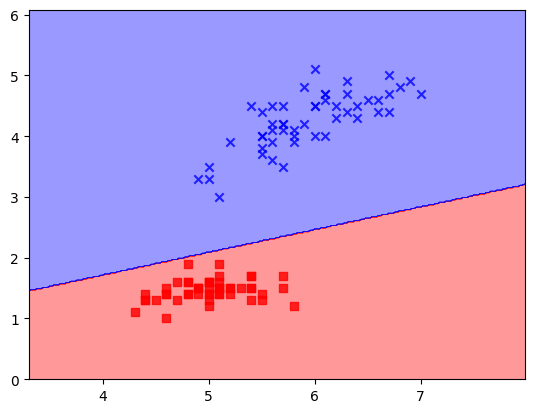

In [29]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)
plot_decision_regions(X, y, classifier=ppn)

Fungsi plot_decision_regions dibuat untuk memvisualisasikan daerah keputusan.
Menggunakan matplotlib dan numpy untuk plotting dan perhitungan.
Membuat grid points untuk seluruh area data.
Menggunakan metode predict dari classifier untuk memprediksi label setiap titik grid.
Menggambar kontur untuk memisahkan daerah keputusan.
Memplot sampel data asli.

kemudian pada saat visualisasi
Grafik menunjukkan dua kelas yang dipisahkan oleh garis keputusan.
Warna merah mewakili satu kelas (kemungkinan Iris setosa).
Warna biru mewakili kelas lainnya (kemungkinan Iris versicolor).
Titik-titik menunjukkan sampel data asli.
Area berwarna menunjukkan daerah keputusan untuk masing-masing kelas

**kesimpulannya**
Perceptron berhasil menemukan garis pemisah yang baik antara dua kelas Iris.
Data ini menunjukkan pemisahan linear yang baik, sesuai dengan kinerja model yang kita lihat sebelumnya.
Visualisasi ini membantu memahami bagaimana Perceptron membuat keputusan klasifikasi berdasarkan fitur input.


# **Praktikum 2**

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



Import Library:

sklearn digunakan untuk dataset, ekstraksi fitur, model Perceptron, dan metrik evaluasi.


Persiapan Data:

Mengambil subset dari dataset 20 Newsgroups untuk 3 kategori: hockey, baseball, dan mobil.
Data dibagi menjadi set pelatihan dan pengujian.
Headers, footers, dan quotes dihapus untuk mengurangi noise.


Ekstraksi Fitur:

Menggunakan TfidfVectorizer untuk mengubah teks menjadi vektor numerik.
TF-IDF (Term Frequency-Inverse Document Frequency) menghitung pentingnya kata dalam dokumen.


Pelatihan Model:

Inisialisasi model Perceptron dengan random_state=11 untuk reproducibility.
Melatih model menggunakan data pelatihan yang telah di-vektorisasi.


Prediksi dan Evaluasi:

Melakukan prediksi pada data uji.
Menggunakan classification_report untuk menampilkan metrik evaluasi terperinci.

Hasilnya

Akurasi keseluruhan: 0.86 (86%)
Rata-rata makro:
Precision: 0.86, Recall: 0.86, F1-score: 0.86
Rata-rata tertimbang:
Precision: 0.86, Recall: 0.86, F1-score: 0.86

# **Praktikum 3**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#@title Buat data
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Menggunakan MLPClassifier dari sklearn.
Data input X: [[0, 0], [0, 1], [1, 0], [1, 1]] (4 sampel dengan 2 fitur)
Label y: [0, 1, 1, 0]
menggunakan operasi dengan logika XOR, yang tidak bisa diselesaikan oleh Perceptron sederhana.

In [ ]:
#@title fit model
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

In [ ]:
#@title prediksi
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


Model MLPClassifier berhasil mempelajari pola XOR dengan sempurna pada data training.


# **Praktikum 4**

In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [33]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

X mengambil semua baris dan kolom dari indeks 3 hingga kolom terakhir (tidak termasuk), sedangkan y mengambil kolom terakhir sebagai target.

In [34]:
#@title Cek data set
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [35]:
#@title Encoding data Kategorikal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [36]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Menggunakan LabelEncoder untuk mengubah data kategorikal pada kolom ke-3 (indeks 2) menjadi angka.

In [37]:
#@title Encoding Kolom "Geography" dengan One Hot Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Menggunakan OneHotEncoder untuk mengubah kolom "Geography" (indeks 1) menjadi representasi biner.

In [39]:
#@title Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Membagi data menjadi 80% untuk pelatihan dan 20% untuk pengujian.

In [40]:
#@title Scaling FItur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Melakukan normalisasi pada fitur-fitur menggunakan StandardScaler untuk memastikan semua fitur berada pada skala yang sama.

## **Membuat Model ANN**

In [41]:
#@title inisialisasi model
ann = tf.keras.models.Sequential()

Ini membuat sebuah model Sequential dari Keras. Model Sequential adalah tumpukan linear dari layer-layer neural network.

In [42]:
#@title Membuat Input Layer dan Hidden Layer Pertama
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Ini menambahkan layer Dense pertama ke model.
units=6 berarti layer ini memiliki 6 neuron.
activation='relu' menggunakan fungsi aktivasi ReLU (Rectified Linear Unit).
Layer ini akan berfungsi sebagai input layer dan hidden layer pertama.

ReLU(x) = max(0, x)
Artinya, ReLU mengembalikan x jika x positif, dan 0 jika x negatif atau nol.

In [43]:
#@title membuat hidden layer kedua
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Menambahkan layer Dense kedua dengan konfigurasi yang sama seperti layer pertama.
Ini menjadi hidden layer kedua dalam jaringan ANN

In [ ]:
#@title membuat output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Menambahkan layer output.
units=1 karena kita hanya membutuhkan satu output (kemungkinan churn atau tidak).
activation='sigmoid' menggunakan fungsi aktivasi sigmoid, yang menghasilkan output antara 0 dan 1, cocok untuk klasifikasi biner.

## **Training Model**

In [ ]:
#@title Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Optimizer: 'adam'
Adam (Adaptive Moment Estimation) adalah algoritma optimasi yang populer yg menggabungkan ide dari RMSprop dan momentum, menyesuaikan learning rate untuk setiap parameter.
Loss Function: 'binary_crossentropy'
Ini adalah fungsi kerugian yang cocok untuk klasifikasi biner (dua kelas) yg mengukur perbedaan antara distribusi probabilitas yang diprediksi dan yang sebenarnya.
Metrics: ['accuracy']
Ini menentukan bahwa akurasi akan digunakan untuk mengevaluasi kinerja model selama pelatihan dan validasi.

In [ ]:
#@title Langkah 2 - Fitting Model
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6445 - loss: 0.6536
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7951 - loss: 0.4710
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8085 - loss: 0.4355
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8107 - loss: 0.4278
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8168 - loss: 0.4140
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.3967
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8322 - loss: 0.3894
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.3828
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8441 - loss: 0.3683
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8520 - loss: 0.3577
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8486 - loss: 0.3645
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## **Diberikan informasi sebagai berikut,**

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

Apakah customer tersebut perlu dipertahankan?

In [ ]:
#@title Modelkan Data Baru dan Buat Prediksi
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[False]]


HASILNYA FALSE
Model memprediksi False, yang berarti probabilitas churn (pelanggan meninggalkan bank) kurang dari 0.5 atau 50%.
Dengan kata lain, model memprediksi bahwa pelanggan ini cenderung akan tetap bertahan sebagai nasabah bank.

In [ ]:
#@title prediksi data testing
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Model melakukan prediksi pada data testing, dan hasilnya diubah menjadi nilai biner (0 atau 1) dengan threshold 0.5.

In [ ]:
#@title Cek Akurasi dan Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1515   80]
 [ 195  210]]


0.8625

True Negatives (TN) = 1515: Jumlah pelanggan yang benar diprediksi tidak akan churn.
False Positives (FP) = 80: Jumlah pelanggan yang salah diprediksi akan churn.
False Negatives (FN) = 195: Jumlah pelanggan yang salah diprediksi tidak akan churn.
True Positives (TP) = 210: Jumlah pelanggan yang benar diprediksi akan churn.

